In [1]:
%pylab inline
from __future__ import division, print_function, absolute_import

import tflearn
import numpy as np
from pprint import pprint
from PIL import Image
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation

Populating the interactive namespace from numpy and matplotlib


### Download CIFAR-10 and Prepare X, and Y dataset

| Variable | Shape   | Description |
|:---------|:--------|:------------|
|   X      | (50000, 32, 32, 3)    | 32 * 32 (RGB 3개) 이미지들 50000개의 데이터셋 |
|   Y      | (50000, 10)           | [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 처럼 정답이 들어 있는 50000개의 데이터셋 |
| X_test   | (10000, 32, 32, 3)    | 10000개의 테스트 데이터셋 |
| Y_test   | (10000, 10)           | 10000개의 정답이 들어있는 테스트 데이터 셋 |


**to_categorical(Y, 10)** <br>
원래 Y의 값은 1 dimentional array (50000,) 로서 5만개의 정답을 갖고 있는 데이터셋. <br>
하지만 to_categorical 함수를 거치면 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 처럼 머신러닝에서 사용가능한 패턴으로 변화됨


In [2]:
# Data loading and preprocessing
from tflearn.datasets import cifar10
(X, Y), (X_test, Y_test) = cifar10.load_data()
X, Y = shuffle(X, Y)
Y = to_categorical(Y, 10)
Y_test = to_categorical(Y_test, 10)

In [3]:
# Real-time data preprocessing
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

In [4]:
# Real-time data augmentation
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)

In [5]:
# Convolutional network building
network = input_data(shape=[None, 32, 32, 3],
                     data_preprocessing=img_prep,
                     data_augmentation=img_aug)
network = conv_2d(network, 32, 3, activation='relu')
network = max_pool_2d(network, 2)
network = conv_2d(network, 64, 3, activation='relu')
network = conv_2d(network, 64, 3, activation='relu')
network = max_pool_2d(network, 2)
network = fully_connected(network, 512, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 10, activation='softmax')
network = regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)

In [6]:
# Train using classifier
model = tflearn.DNN(network, tensorboard_verbose=0)
model.fit(X, Y, n_epoch=50, shuffle=True, validation_set=(X_test, Y_test),
          show_metric=True, batch_size=96, run_id='cifar10_cnn')

Training Step: 26050  | total loss: 0.35019
| Adam | epoch: 050 | loss: 0.35019 - acc: 0.8885 | val_loss: 0.71749 - val_acc: 0.8045 -- iter: 50000/50000
Training Step: 26050  | total loss: 0.35019
| Adam | epoch: 050 | loss: 0.35019 - acc: 0.8885 | val_loss: 0.71749 - val_acc: 0.8045 -- iter: 50000/50000
--


### TensorBoard

아래의 코드를 통해서 Graph를 볼 수 있습니다.

```
tensorboard --logdir='/tmp/tflearn_logs'
```


In [7]:
print('Predict')
pprint(model.predict(X[101:102].copy()))

print('\nAnswer')
pprint(Y[101:102].tolist())

Predict
[[8.330639502673876e-07,
  6.3362439739478305e-09,
  1.7060130630852655e-05,
  3.1393783501698636e-06,
  1.269179119844921e-05,
  0.000503903313074261,
  3.2698951879517324e-10,
  0.9994624257087708,
  3.65227882659358e-11,
  7.258590256631337e-11]]

Answer
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]


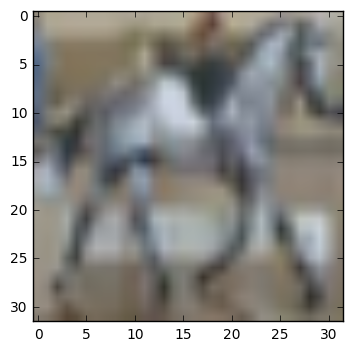

In [8]:
imshow(X[101])